In [66]:
# Name: Zile Zhu, Matthew Healy, Lauren Jernigan, Aubrey Turner

## Data Selection

For this task we decided to use the Rain in Australia dataset. This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more. Check out the dataset [here](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package). The Australian government continues to update from [here] (http://www.bom.gov.au/nsw/observations/nswall.shtml?ref=hdr), and updates data can be gathered [here](http://www.bom.gov.au/climate/dwo/202204/html/IDCJDW2006.202204.shtml).

In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

pd.__version__ #print which version of pandas you're using

'1.4.0'

Read in the dataset. You can find more on reading CSV (Comma Separated Values) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [6]:
rain_data = pd.read_csv("weatherAUS.csv")
print(rain_data.shape)
rain_data.head()

(145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Data Explanation and Selection

Where are the NaN variables in our dataset? Do they seem to be more common in certain features?

In [4]:
# your code goes here
for column in rain_data.columns:
    print(column, rain_data[column].isnull().sum())

Date 0
Location 0
MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustDir 10326
WindGustSpeed 10263
WindDir9am 10566
WindDir3pm 4228
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
RainToday 3261
RainTomorrow 3267


It's interesting how the clouds have a lot of N/A variables. Could the N/A values simply be 0.0 for cloud cover?

In [49]:
print("NA", rain_data["Cloud9am"].isna().sum())
print(rain_data["Cloud9am"].value_counts())
print("NA", rain_data["Cloud3pm"].isna().sum())
print(rain_data["Cloud3pm"].value_counts())
# TODO: get rid of cloud

NA 55888
7.0    19972
1.0    15687
8.0    14697
0.0     8642
6.0     8171
2.0     6500
3.0     5914
5.0     5567
4.0     4420
9.0        2
Name: Cloud9am, dtype: int64
NA 59358
7.0    18229
1.0    14976
8.0    12660
6.0     8978
2.0     7226
3.0     6921
5.0     6815
4.0     5322
0.0     4974
9.0        1
Name: Cloud3pm, dtype: int64


Are there any rows that aren't missing values, and if so, how many?

In [17]:
rain_data_complete = rain_data[rain_data.isna().any(axis = 1) == False]
rain_data_has_label = rain_data[rain_data["RainTomorrow"].isna() == False]
print(rain_data_complete.shape)
print(rain_data_has_label.shape)

(56420, 23)
(142193, 23)


The rain_data_complete dataset will contain only rows that are not missing values (i.e. they don't have N/A values)

The rain_data_complete dataset will contain only rows that are not missing the RainTomorrow label, since that is what we are trying to predict.

In [19]:
for column in rain_data_has_label.columns:
    print(column, rain_data_has_label[column].isnull().sum())

Date 0
Location 0
MinTemp 637
MaxTemp 322
Rainfall 1406
Evaporation 60843
Sunshine 67816
WindGustDir 9330
WindGustSpeed 9270
WindDir9am 10013
WindDir3pm 3778
WindSpeed9am 1348
WindSpeed3pm 2630
Humidity9am 1774
Humidity3pm 3610
Pressure9am 14014
Pressure3pm 13981
Cloud9am 53657
Cloud3pm 57094
Temp9am 904
Temp3pm 2726
RainToday 1406
RainTomorrow 0


For the rain_data_has_label dataset, we still want to remove data points that have too many N/A variables to be useful. 



In [35]:
for limit in range(1, 10):
    rain_limited_NAs = rain_data_has_label[rain_data_has_label.isna().sum(axis = 1) < limit]
    print(limit, rain_limited_NAs.shape)
    # TODO: Make graph

NA_THRESHOLD = 4
rain_limited_NAs = rain_data_has_label[rain_data_has_label.isna().sum(axis = 1) < NA_THRESHOLD]
print(rain_limited_NAs.shape)

for column in rain_limited_NAs.columns:
    print(column, rain_limited_NAs[column].isnull().sum())


1 (56420, 23)
2 (67185, 23)
3 (85218, 23)
4 (94829, 23)
5 (123369, 23)
6 (127011, 23)
7 (136949, 23)
8 (138750, 23)
9 (139714, 23)
(94829, 23)
Date 0
Location 0
MinTemp 61
MaxTemp 28
Rainfall 119
Evaporation 16105
Sunshine 21570
WindGustDir 3932
WindGustSpeed 3921
WindDir9am 2982
WindDir3pm 317
WindSpeed9am 33
WindSpeed3pm 14
Humidity9am 237
Humidity3pm 224
Pressure9am 116
Pressure3pm 68
Cloud9am 12157
Cloud3pm 13578
Temp9am 68
Temp3pm 15
RainToday 119
RainTomorrow 0


What are the locations of the cities? And which cities have complete data and which ones don't? 

In [40]:
print("City entries from entire dataset:")
print(rain_data["Location"].value_counts())
print("City entries from cleaned dataset:")
print(rain_data_complete["Location"].value_counts())

City entries from entire dataset:
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga      

If we filled in the other N/A's via imputation, the best way to do this is to average the values the day before and the day after.
However, given that we have enough data and that imputation is likely not that accurate for this dataset, we decided to use the completely cleaned dataset to do our feature selection on.

## Feature Engineering

Create a scatter plot between `Rainfall` and one of all the other features. Additionally, group each city into its own color. Place `Rainfall` on the Y axis. 

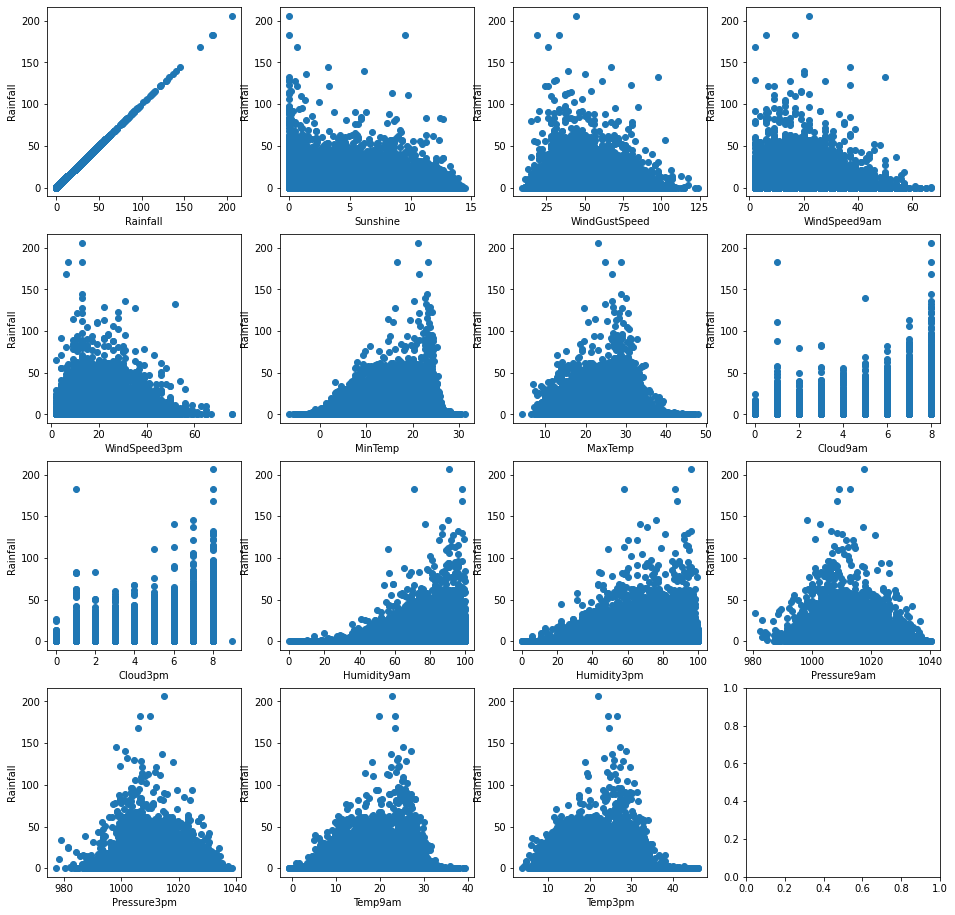

In [56]:


colors = {1:'red',2:'green',3:'blue',4:'purple'}

# TODO: figure out best plot (stacked histogram?)
# TODO: feature engineer the rainfallTomorrow value
# TODO: convert date to day of the year
categorical = ["Location", "RainToday", "RainTomorrow", "WindGustDir", "WindDir9am", "WindDir3pm", "Cloud9am", "Cloud3pm"]
continuous = ["Rainfall", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "MinTemp", "MaxTemp", "Cloud9am", "Cloud3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm"]

figs, axs = plt.subplots(4, 4, figsize=(16,16))
for i in range(min(len(continuous), 16)):
    column = continuous[i]
    axs[i//4, i % 4].set(xlabel = column , ylabel = "Rainfall")
    axs[i//4, i % 4].scatter(rain_data_complete[column], rain_data_complete["Rainfall"])


Q5. Calculate the correlation coefficient between all the continous attributes.

In [61]:
rain_data_complete[continuous].corr()

,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,MinTemp,MaxTemp,Cloud9am,Cloud3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
Rainfall,1.000000,-0.246379,0.106308,0.050584,0.044112,0.110800,-0.069981,0.217169,0.191433,0.263625,0.277625,-0.180606,-0.137302,0.013713,-0.074627
Sunshine,-0.246379,1.000000,-0.052422,-0.013842,0.029200,0.076087,0.463913,-0.677939,-0.702022,-0.500343,-0.629299,0.043330,-0.020632,0.289038,0.486129
WindGustSpeed,0.106308,-0.052422,1.000000,0.608852,0.685236,0.118054,0.035531,0.088129,0.131590,-0.193410,-0.042653,-0.430363,-0.383683,0.085520,-0.000382
WindSpeed9am,0.050584,-0.013842,0.608852,1.000000,0.502226,0.108522,-0.008171,0.034908,0.062507,-0.236795,-0.058449,-0.201518,-0.155484,0.053749,-0.018357
WindSpeed3pm,0.044112,0.029200,0.685236,0.502226,1.000000,0.137273,0.012266,0.068224,0.041475,-0.100626,0.031843,-0.293155,-0.252095,0.114043,-0.009436
MinTemp,0.110800,0.076087,0.118054,0.108522,0.137273,1.000000,0.749687,0.106177,0.042173,-0.174991,0.070827,-0.475661,-0.495577,0.906295,0.727222
MaxTemp,-0.069981,0.463913,0.035531,-0.008171,0.012266,0.749687,1.000000,-0.263634,-0.257752,-0.495781,-0.448116,-0.350980,-0.451691,0.893387,0.984841
Cloud9am,0.217169,-0.677939,0.088129,0.034908,0.068224,0.106177,-0.263634,1.000000,0.614380,0.438962,0.509223,-0.150427,-0.081791,-0.109591,-0.281213
Cloud3pm,0.191433,-0.702022,0.131590,0.062507,0.041475,0.042173,-0.257752,0.614380,1.000000,0.348707,0.510996,-0.166334,-0.103173,-0.107885,-0.297230
Humidity9am,0.263625,-0.500343,-0.193410,-0.236795,-0.100626,-0.174991,-0.495781,0.438962,0.348707,1.000000,0.685697,0.114575,0.172972,-0.423598,-0.487758


Create a plot to determine if there are any outliers in the `average-contrast` attribute.

{'whiskers': [<matplotlib.lines.Line2D at 0x17d10c250>,
 'caps': [<matplotlib.lines.Line2D at 0x17d101af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17d10caf0>],
 'medians': [<matplotlib.lines.Line2D at 0x17d101070>],
 'fliers': [<matplotlib.lines.Line2D at 0x17d177be0>],
 'means': []}

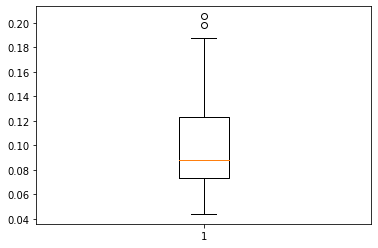

In [74]:
# your code goes here
plt.boxplot(leaf_data['average-contrast'])
# It seems like there are two outliers

Q7. Data scaling

* Use `sklearn.preprocessing.StandardScaler` to standardize the dataset’s features. Call `.fit_transform` to calculate the scaled data (fit) and replace the existing data with the scaled data (transform).
* Note that `fit_transform` returns a numpy array. Put your scaled data back into a DataFrame by doing something like this (subsitute your variable names): `scaled_data = DataFrame(numpy_array_data, columns=leaf_data.columns)`
* Display something to show that the data has been scaled correctly (the head of the data frame, *and/or* the mean of each column which should be ~0, *and/or* the standard deviation of each column which should be ~1.)

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
temp_data = leaf_data.drop(["class"], axis = 1)
scaled_data = scaler.fit_transform(temp_data.values)
scaled_df = pd.DataFrame(scaled_data, columns = temp_data.columns)
scaled_df.head()

,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,0.283529,-0.531196,0.395212,-1.262773,-0.441095,-0.875478,1.116108,0.890913,-0.358758,-0.276976,-0.366061,-0.335186,-0.446737,-0.263256
1,1.709039,1.447597,1.416854,0.559789,0.714453,-0.809227,-0.740953,-0.688901,-0.579956,-0.734593,-0.674961,-0.813314,-0.456439,-0.533339
2,-1.423982,-0.522047,-1.012484,0.638209,0.692846,0.299095,-0.681097,-0.674420,0.557730,0.823063,0.635813,0.761190,0.043125,0.764238
3,-0.138165,-0.508525,0.691019,-1.598947,-1.434686,-0.953551,1.524256,1.551250,-0.417379,-0.354676,-0.423053,-0.379852,-0.496638,-0.322750
4,-0.878530,-0.508165,-0.922422,0.637376,0.692846,0.395487,-0.588718,-0.647312,2.227521,1.846307,1.882116,1.424579,1.512359,2.769444


In [76]:
scaled_df.describe()

,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
count,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01
mean,-3.923144e-16,-5.337611e-18,3.095814e-16,7.301851e-16,5.316260e-16,1.313052e-16,1.558582e-16,1.067522e-16,-2.049643e-16,-4.611696e-16,4.270089e-17,-1.195625e-16,3.416071e-17,-3.416071e-17
std,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00
min,-1.719964e+00,-5.311962e-01,-1.294052e+00,-1.709808e+00,-2.374230e+00,-1.161357e+00,-9.163208e-01,-7.173453e-01,-9.897725e-01,-1.465899e+00,-1.033102e+00,-1.181420e+00,-7.477159e-01,-1.328653e+00
25%,-6.765289e-01,-5.107431e-01,-9.828770e-01,-1.290670e+00,-7.003265e-01,-8.955253e-01,-7.309311e-01,-6.866341e-01,-5.801078e-01,-6.958099e-01,-6.512935e-01,-7.285392e-01,-5.740442e-01,-6.164975e-01
50%,-1.821579e-01,-4.919593e-01,2.954545e-01,6.051952e-01,6.388299e-01,-6.918154e-01,-5.936111e-01,-6.488859e-01,-3.477442e-01,-3.008438e-01,-3.836834e-01,-3.575189e-01,-4.664657e-01,-3.267214e-01
75%,3.486397e-01,-4.338434e-01,6.191808e-01,7.184381e-01,6.955393e-01,9.908940e-01,1.282551e+00,1.146930e+00,3.202602e-01,6.347915e-01,4.391088e-01,3.537397e-01,1.671184e-02,4.204347e-01
max,1.723059e+00,3.277599e+00,1.575176e+00,8.818000e-01,7.252251e-01,1.659464e+00,1.949107e+00,2.358346e+00,3.465257e+00,2.817219e+00,3.325973e+00,2.870640e+00,3.575237e+00,3.183163e+00


Q8. Dimensionality reduction using PCA

* Use `sklearn.decomposition.PCA` to perform PCA on the **scaled** data.
* Set `n_components` to 0.95 and `svd_solver` to 'full', so that the PCA will reduce the number of dimensions to however many dimensionsare necessary to retain 95% of the variance. 
* Use `.fit_transform` to calculate the dimensionality reduction (fit) and to replace the existing data with the transformed data (transform). 
* Note that `fit_transform` returns a numpy array. Put the transformed data back into a Pandas DataFrame by doing something like this (subsitute your variable names): `pca_data = DataFrame(numpy_array_data)`
* Show the head of the resulting DataFrame to make sure the dimensionality has actually been reduced.

In [79]:
# your code goes here
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, svd_solver='full')
numpy_pca = pca.fit_transform(scaled_df)
pca_data = pd.DataFrame(numpy_pca)
pca_data.head()

,0,1,2,3
0,-1.744661,1.411601,-0.149376,-0.032633
1,-1.730185,-2.570992,-1.465456,-0.235863
2,2.397844,0.108658,0.653771,0.870315
3,-2.409913,2.452630,-0.140498,-0.176198
4,4.919649,1.049709,-1.074663,-0.295849


## Part 2: Adult Census Dataset

For this task we'll be using the 1994 Adult Census Income data (`adult.csv`) collected by Ronny Kohavi and Barry Becker. This is a reasonably clean dataset with both categorical and integer attributes. The dataset consists of `32.5K` rows with 14 attributes.

#### Attributes

You can find a description of the dataset [here](https://archive.ics.uci.edu/ml/datasets/Adult).

| Attribute Name 		| Type 				|
| --------------------- | ----------------- |
| age					| continuous		|
| workclass				| categorical		|
| fnlwgt				| continuous		|
| education 			| categorical		|
| education-num			| categorical		|
| marital-status		| categorical		|
| occupation			| categorical		|
| relationship			| categorical		|
| race					| categorical		|
| sex					| categorical		|
| capital-gain			| continuous		|
| capital-loss			| continuous		|
| hours-per-week		| continuous		|
| native-country		| categorical		|

Read in the data. You can find more on reading CSV (Comma Separated Value) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [80]:
# add skipinitialspace=True to skip spaces after delimiter (will be required later for the map function)
adult_data = pd.read_csv("adult.csv", skipinitialspace=True)
print(adult_data.shape)
# show the head of the data (first 5 values)
adult_data.head()

(32561, 14)


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [81]:
# display data types of various columns in the dataframe
adult_data.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Q9. Show the distribution of the dataset with respect to the `education` column (how many people have each level of education). Choose a plot that is suitable to show this.

<AxesSubplot:>

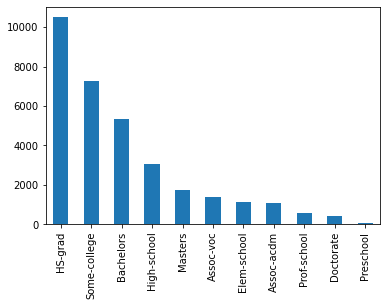

In [82]:
# your code here
adult_data["education"].value_counts().plot(kind='bar')

Q10.
* Group the `adult_data` using the `marital-status` column. You may want to look at the `groupby()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html).
* Display the mean, median and standard deviation statistics of `hours-per-week` column for each `marital-status` category.
* As a comment, note which marital status category has the maximum average work hours per week? Which has the most variability in work hours per week? 

In [83]:
# your code here
adult_data.groupby(['marital-status'])['hours-per-week'].describe()
# The married (non-military) AF spouses have the maximum average work hours per week
# The widowed have the most variability (largest standard deviation) in work hours

,count,mean,std,min,25%,50%,75%,max
marital-status,,,,,,,,
Divorced,4443.0,41.246680,10.676632,1.0,40.0,40.0,45.0,99.0
Married-AF-spouse,23.0,41.130435,19.440596,3.0,39.0,40.0,47.0,90.0
Married-civ-spouse,14976.0,43.284856,11.905047,1.0,40.0,40.0,50.0,99.0
Married-spouse-absent,418.0,39.669856,11.767374,3.0,37.0,40.0,40.0,99.0
Never-married,10683.0,36.939998,12.432542,1.0,30.0,40.0,40.0,99.0
Separated,1025.0,39.301463,10.377534,2.0,37.0,40.0,40.0,99.0
Widowed,993.0,32.979859,14.058690,1.0,21.0,40.0,40.0,99.0


In [84]:
# Please don't change this cell!!
continent_dict = {
    'Cambodia' : 'Asia',
    'Canada' : 'North-America',
    'China' : 'Asia',
    'Columbia' : 'South-America',
    'Cuba' : 'North-America',
    'Dominican-Republic' : 'North-America',
    'Ecuador' : 'South-America',
    'El-Salvador' : 'North-America',
    'England' : 'Europe',
    'France' : 'Europe',
    'Germany' : 'Europe',
    'Greece' : 'Europe',
    'Guatemala' : 'North-America',
    'Haiti' : 'North-America',
    'Holand-Netherlands' : 'Europe',
    'Honduras' : 'North-America',
    'Hong' : 'Asia',
    'Hungary' : 'Europe',
    'India' : 'Asia',
    'Iran' : 'Asia',
    'Ireland' : 'Europe',
    'Italy' : 'Europe',
    'Jamaica' : 'North-America',
    'Japan' : 'Asia',
    'Laos' : 'Asia',
    'Mexico' : 'North-America',
    'Nicaragua' : 'North-America',
    'Outlying-US(Guam-USVI-etc)' : 'North-America',
    'Peru' : 'South-America',
    'Philippines' : 'Asia',
    'Poland' : 'Europe',
    'Portugal' : 'Europe',
    'Puerto-Rico' : 'North-America',
    'Scotland' : 'Europe',
    'South' : 'Other',
    'Taiwan' : 'Asia',
    'Thailand' : 'Asia',
    'Trinadad&Tobago' : 'South-America',
    'United-States' : 'North-America',
    'Vietnam' : 'Asia',
    'Yugoslavia' : 'Europe',
    '?' : 'Other'
}

Q11. Using the dictionary provided above, create a new column called `continent` using the existing `native-country` column in the dataframe. You may want to look at the `map()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html). Display the head of the new dataframe.

In [85]:
# You will want to create a deep copy of the initial dataframe object
# so that you can run this cell multiple times without errors.
adult_data_copy = adult_data.copy()
# add the new column to adult_data_copy
# your code goes here
adult_data_copy['continent'] = adult_data['native-country'].map(continent_dict, na_action='ignore')
adult_data_copy.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,continent
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,North-America
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,North-America
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,North-America
3,53,Private,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,North-America
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,North-America


Q12. Create a bar graph showing the average age of adults from each continent, and show the standard deviation on the same graph.

An example bar plot with standard deviation bars:
<img src="imgs/screen5.png" width=200>

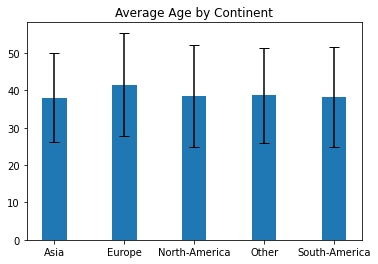

In [86]:
# Code adapted from link below 
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py

ages = adult_data_copy.groupby(['continent'])['age']
mean = ages.mean()
std = ages.std()

ind = range(len(mean))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, mean, width, yerr=std, capsize = 5)

plt.title('Average Age by Continent')
plt.xticks(ind, mean.keys())
plt.show()

Q13. To reduce the dimensionality of this dataset using feature selection, which attribute or attributes would you eliminate? Explain why.

In [ ]:
'''Explain why here (as a comment):
 I would eliminate the education attribute because the education-number 
 is a numerical value that contains the information in the categorical education
 attribute. The numerical value is more nuanced and contains more information as well.
 
 I would also combine the capital gain and loss attributes into a single + or - value. This
 makes the data more compact without losing too much information.
 
'''